Overian Cancer Prediction

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_excel('Supplementary data 1.xlsx')

print(data.shape)

# Step 1: Clean the dataset
data_cleaned = data.replace('\t', '', regex=True)

# Step 2: Convert any numeric-looking strings to actual numbers
data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce')

# Step 3: Separate numeric and non-numeric columns
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
non_numeric_columns = data_cleaned.select_dtypes(exclude=['float64', 'int64']).columns

# Step 4: Impute missing values in numeric columns
imputer = SimpleImputer(strategy='mean')
data_numeric_imputed = pd.DataFrame(imputer.fit_transform(data_cleaned[numeric_columns]), columns=numeric_columns)

# Step 5: Combine the imputed numeric data back with non-numeric data (if needed)
# If non-numeric columns are not needed, you can ignore this step.

# Step 6: Prepare features (X) and target (y)
X = data_numeric_imputed.drop(columns=['SUBJECT_ID'])  # Drop irrelevant columns
y = data_cleaned['TYPE'].dropna()  # Ensure the target variable is clean and numeric

# Step 7: Select top 8 features using SelectKBest
selector = SelectKBest(score_func=f_classif, k=8)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(f"Selected features: {selected_features}")

# Step 8: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Step 9: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



(349, 51)
Selected features: Index(['Age', 'ALB', 'CA125', 'TYPE', 'HE4', 'LYM%', 'Menopause', 'NEU'], dtype='object')


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Logistic Regression Accuracy: 100.00%


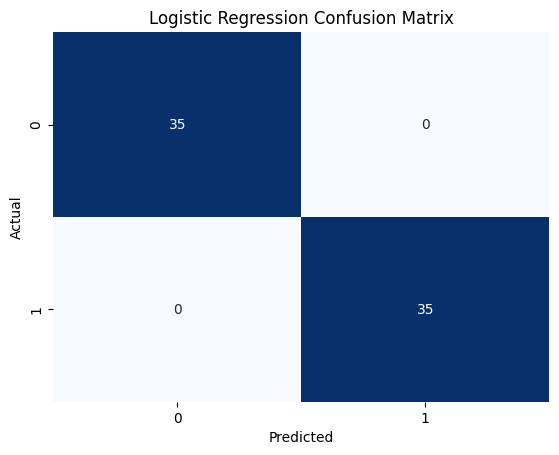

In [57]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)

# Prediction and Evaluation
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")

# Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predict function for Logistic Regression
def predict_new_logreg(new_data):
    new_data_scaled = scaler.transform(new_data)
    return logreg.predict(new_data_scaled)


Random Forest Accuracy: 100.00%


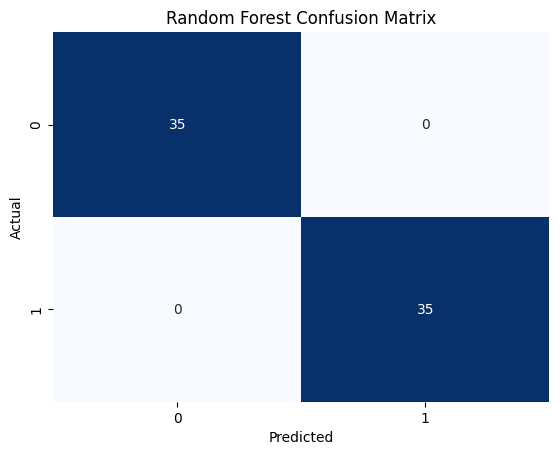

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Train Random Forest with hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Best model and evaluation
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predict function for Random Forest
def predict_new_rf(new_data):
    new_data_scaled = scaler.transform(new_data)
    return best_rf.predict(new_data_scaled)


SVM Accuracy: 100.00%


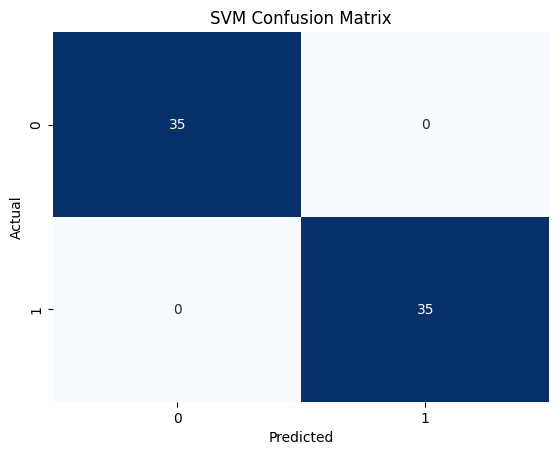

In [59]:
from sklearn.svm import SVC

# Train SVM with hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC()
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)

# Best model and evaluation
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predict function for SVM
def predict_new_svm(new_data):
    new_data_scaled = scaler.transform(new_data)
    return best_svm.predict(new_data_scaled)



KNN Accuracy: 98.57%


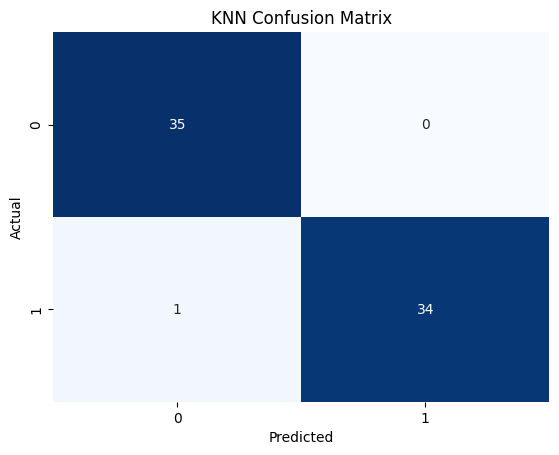

In [60]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN with hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

# Best model and evaluation
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predict function for KNN
def predict_new_knn(new_data):
    new_data_scaled = scaler.transform(new_data)
    return best_knn.predict(new_data_scaled)


Decision Tree Accuracy: 100.00%


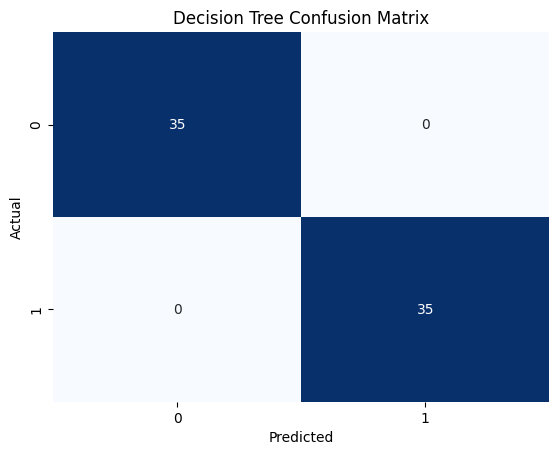

In [61]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree with hyperparameter tuning
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

# Best model and evaluation
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predict function for Decision Tree
def predict_new_dt(new_data):
    new_data_scaled = scaler.transform(new_data)
    return best_dt.predict(new_data_scaled)


Confusion Matrix:
[[35  0]
 [ 0 35]]


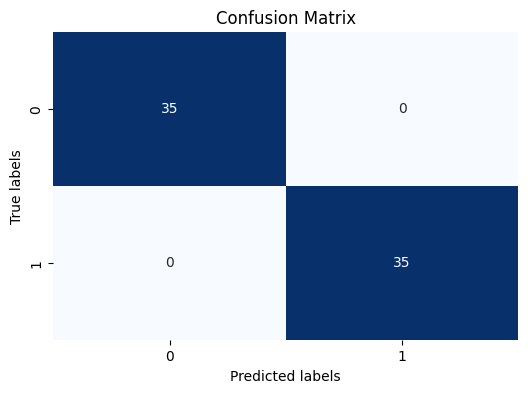

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

Cross-Validation Accuracy Scores: [1.         1.         1.         0.98571429 1.        ]
Mean CV Accuracy: 0.9971


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)  # Train the model

# Step 2: Predict the values on the test set
y_pred = model.predict(X_test)

# Step 3: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Step 4: Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
